In [11]:
import numpy as np 
from numpy import log,dot,e,shape
import matplotlib.pyplot as plt
import pandas as pd
data=pd.read_csv("D:\\Question 4\\Qn3_Braintumor\\bt_dataset_t3.csv")

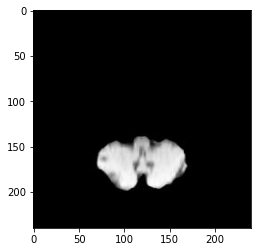

In [12]:
image=plt.imread("D:\Question 4\Qn3_Braintumor\Brain Tumor\Image1.jpg")
plt.imshow(image, cmap='gray')

In [13]:
size=image.size
length=len(image)
sum=image.sum()
count=size*length*length
mean=sum/count
mean=mean*100000 
mean

25.604443962191354

In [14]:
#standard-devition 
from PIL import Image, ImageStat
im = Image.open("D:\Question 4\Qn3_Braintumor\Brain Tumor\Image1.jpg")
stat = ImageStat.Stat(im)
std=stat.stddev
std=std[0]
std

53.41046518943892

In [15]:
#variance
var=stat.var
var=var[0]
var

2852.677791752267

In [16]:
#median
median=stat.median
median=median[0]
median

0

In [17]:
#skewness
from scipy.stats import kurtosis,skew
skewness=skew(image, axis=None)
skewness

3.5193199291454884

In [18]:
#energy
import cv2
from pywt import dwt2
import pywt
im = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
m,n = im.shape

cA, (cH, cV, cD) = pywt.dwt2(im,'db1')
# a - LL, h - LH, v - HL, d - HH as in matlab
cHsq = [[elem * elem for elem in inner] for inner in cH]
cVsq = [[elem * elem for elem in inner] for inner in cV]
cDsq = [[elem * elem for elem in inner] for inner in cD]
Energy = (np.sum(cHsq) + np.sum(cVsq) + np.sum(cDsq))/(m*n)
print (Energy)

18.245598958333343


In [19]:
#Pre-Processing

In [20]:
data.isnull()

,Image,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness,PSNR,SSIM,MSE,DC,Target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1639,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1640,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1641,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1642,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [21]:
data.describe()

,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness,PSNR,SSIM,MSE,DC,Target
count,1644.000000,1644.000000,1644.000000,1644.000000,1275.000000,1275.000000,1644.000000,1644.000000,1644.000000,1644.000000,1644.000000,1644.000000,1.644000e+03,1644.000000,1275.000000,1644.000000,1546.000000,1644.000000
mean,3.125191,377.214252,14.206369,0.949141,16.996439,742.215017,58.206011,0.968980,0.942412,0.979727,0.546093,0.895361,7.458341e-155,inf,0.939480,0.036449,0.320465,0.881387
std,5.359059,548.174013,13.247645,0.094175,21.247054,2934.685940,76.370330,0.059090,0.105063,0.036854,0.779876,0.115596,0.000000e+00,NaN,0.066399,0.051187,0.312112,0.323431
min,0.000000,0.000000,0.000000,0.530684,1.219356,2.502720,0.000000,0.695889,0.484262,0.811102,0.000000,-0.000035,7.458341e-155,53.378482,0.675997,0.000000,0.000000,0.000000
25%,0.037800,6.030021,2.455609,0.951339,5.437071,30.567200,4.189331,0.971472,0.943758,0.980386,0.029637,0.856232,7.458341e-155,62.394514,0.936873,0.007639,0.000000,1.000000
50%,0.798752,123.306079,11.104325,0.988411,9.377379,88.954857,32.275087,0.993253,0.986552,0.995027,0.249390,0.925825,7.458341e-155,65.822770,0.961182,0.020226,0.247692,1.000000
75%,3.584896,548.029238,23.409950,0.999407,20.319678,415.828216,80.164627,0.999656,0.999311,0.999712,0.679472,0.972652,7.458341e-155,72.015149,0.977311,0.041185,0.599091,1.000000
max,31.031021,3345.853590,57.843354,1.000000,255.994850,65534.242200,743.368131,1.000000,1.000000,1.000000,5.604428,1.000000,7.458341e-155,inf,0.999253,0.298698,0.957969,1.000000


In [22]:
data['Mean'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
1639    False
1640    False
1641    False
1642    False
1643    False
Name: Mean, Length: 1644, dtype: bool

In [23]:
mean_value=data['Variance'].mean()
  
prep=data['Variance'].fillna(value=mean_value, inplace=True)

In [24]:
data['Variance'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
1639    False
1640    False
1641    False
1642    False
1643    False
Name: Variance, Length: 1644, dtype: bool

In [25]:
data.fillna(method ='pad')

,Image,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness,PSNR,SSIM,MSE,DC,Target
0,Image1,23.448517,2538.985627,50.388348,0.651174,1.984202,5.421042,181.467713,0.781557,0.610831,0.847033,2.765411,0.968576,7.458341e-155,97.974630,0.777011,0.171163,0.303989,1
1,Image2,4.398331,834.853030,28.893823,0.953532,6.495203,43.349355,76.745886,0.972770,0.946281,0.980762,0.548605,0.959751,7.458341e-155,110.346597,0.977953,0.009913,0.839019,1
2,Image3,3.244263,642.059166,25.338886,0.966065,7.772860,61.756034,81.752406,0.980161,0.960715,0.985066,0.540411,0.944259,7.458341e-155,112.266298,0.985362,0.006372,0.849775,1
3,Image4,8.511353,1126.214187,33.559115,0.868765,3.763142,15.107579,362.291213,0.921786,0.849690,0.949295,2.765725,0.859027,7.458341e-155,101.955792,0.881015,0.068437,0.000000,0
4,Image5,21.000793,2235.316978,47.279139,0.684724,1.936029,4.722343,312.439226,0.804184,0.646711,0.880301,3.006660,0.938572,7.458341e-155,97.639870,0.766308,0.184878,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1639,Image1640,0.199158,26.491880,5.147026,0.996341,25.826301,668.181974,14.797350,0.997873,0.995751,0.998476,0.113842,0.755553,7.458341e-155,75.822768,0.995798,0.001701,0.000000,0
1640,Image1641,6.885025,802.478515,28.328052,0.878419,3.939967,16.456794,266.135425,0.927687,0.860602,0.951086,2.303173,0.854682,7.458341e-155,60.126401,0.886831,0.063160,0.000000,0
1641,Image1642,1.828186,230.107684,15.169301,0.966424,8.218790,68.539071,105.172699,0.980371,0.961128,0.985590,0.863250,0.799919,7.458341e-155,66.013000,0.964771,0.016285,0.000000,0
1642,Image1643,0.061630,8.029570,2.833650,0.998740,45.985085,2116.600001,6.431276,0.999268,0.998536,0.999401,0.050628,0.649484,7.458341e-155,80.821412,0.998316,0.000538,0.000000,0


In [26]:
# Splitting data set into dependent and independent variables

In [27]:
y=data.Target
x=data.drop(['Image','Target'], axis = 1)

In [28]:
x.head()

,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness,PSNR,SSIM,MSE,DC
0,23.448517,2538.985627,50.388348,0.651174,1.984202,5.421042,181.467713,0.781557,0.610831,0.847033,2.765411,0.968576,7.458341e-155,97.974630,0.777011,0.171163,0.303989
1,4.398331,834.853030,28.893823,0.953532,6.495203,43.349355,76.745886,0.972770,0.946281,0.980762,0.548605,0.959751,7.458341e-155,110.346597,0.977953,0.009913,0.839019
2,3.244263,642.059166,25.338886,0.966065,7.772860,61.756034,81.752406,0.980161,0.960715,0.985066,0.540411,0.944259,7.458341e-155,112.266298,0.985362,0.006372,0.849775
3,8.511353,1126.214187,33.559115,0.868765,3.763142,15.107579,362.291213,0.921786,0.849690,0.949295,2.765725,0.859027,7.458341e-155,101.955792,0.881015,0.068437,0.000000
4,21.000793,2235.316978,47.279139,0.684724,1.936029,4.722343,312.439226,0.804184,0.646711,0.880301,3.006660,0.938572,7.458341e-155,97.639870,0.766308,0.184878,0.000000


In [29]:
y.head()

0    1
1    1
2    1
3    0
4    0
Name: Target, dtype: int64

In [30]:
from sklearn.model_selection import train_test_split  
X_tr,X_te,y_tr,y_te = train_test_split(x,y,test_size=0.1)

In [31]:
def standardize(X_tr):
    for i in range(shape(X_tr)[1]):
        X_tr[:,i] = (X_tr[:,i] - np.mean(X_tr[:,i]))/np.std(X_tr[:,i])
def F1_score(y,y_hat):
    tp,tn,fp,fn = 0,0,0,0
    for i in range(len(y)):
        if y[i] == 1 and y_hat[i] == 1:
            tp += 1
        elif y[i] == 1 and y_hat[i] == 0:
            fn += 1
        elif y[i] == 0 and y_hat[i] == 1:
            fp += 1
        elif y[i] == 0 and y_hat[i] == 0:
            tn += 1
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    f1_score = 2*precision*recall/(precision+recall)
    return f1_score
class LogisticRegression:
    def sigmoid(self,z):
        sig = 1/(1+exp(-z))
        return sig
    def initialize(self,X):
        weights = np.zeros((shape(X)[1]+1,1))
        X = np.c_[np.ones((shape(X)[0],1)),X]
        return weights,X
    def fit(self,X,y,alpha=0.001,iter=400):
        weights,X = self.initialize(X)
        def cost(theta):
            z = dot(X,theta)
            cost0 = y.T.dot(log(self.sigmoid(z)))
            cost1 = (1-y).T.dot(log(1-self.sigmoid(z)))
            cost = -((cost1 + cost0))/len(y)
            return cost
        cost_list = np.zeros(iter,)
        for i in range(iter):
            weights = weights - alpha*dot(X.T,self.sigmoid(dot(X,weights))-np.reshape(y,(len(y),1)))
            cost_list[i] = cost(weights)
        self.weights = weights
        return cost_list
    def predict(self,X):
        z = dot(self.initialize(X)[1],self.weights)
        lis = []
        for i in self.sigmoid(z):
            if i>0.5:
                lis.append(1)
            else:
                lis.append(0)
        return lis
standardize(X_tr)
standardize(X_te)
obj1 = LogisticRegression()
model= obj1.fit(X_tr,y_tr)
y_pred = obj1.predict(X_te)
y_train = obj1.predict(X_tr)
#Let's see the f1-score for training and testing data
f1_score_tr = F1_score(y_tr,y_train)
f1_score_te = F1_score(y_te,y_pred)
print(f1_score_tr)
print(f1_score_te)

TypeError: '(slice(None, None, None), 0)' is an invalid key